<a href="https://colab.research.google.com/github/Gujar-Shubham/Light-Weight-Bird-species-Classification/blob/master/BirdAndroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

dataset_path="/content/drive/MyDrive/Kaggle/bird/archive.zip"
zfile=zipfile.ZipFile(dataset_path)
zfile.extractall()

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import shutil
import os
import cv2
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.applications import Xception
from keras.applications.xception import preprocess_input 
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
train_path = 'train'       
test_path = 'test'           
validate_path = 'valid'

#Creating generator for Training DataSet
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        shear_range=0.1, 
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

#Creating generator for Validation DataSet
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(
        'valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

#Creating generator for Test DataSet
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


In [ ]:
#instantiate a base model with pre-trained weigts.
base_model=keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

#freeze the base model
base_model.trainable = False

#Create new model on top
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(base_model)
#model.add(Flatten())
#model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(225,activation='softmax',kernel_initializer='glorot_normal'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              205522944 
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 225)               461025    
Total params: 226,845,449
Trainable params: 205,983,969
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
#Train the model on new data.
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)
# fit model
#history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
#train_model = model.fit(train_generator,batch_size=32,epochs=0,verbose=1,validation_data=val_generator)
history=model.fit(train_generator,epochs=50,validation_data=val_generator,workers=10,use_multiprocessing=False, callbacks=[es])

In [ ]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('loss')
# Set a title 
#plt.title('Draw a line.')
# Display the figure.
plt.show()
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title 
#plt.title('Draw a line.')
# Display the figure.
plt.show()
plt.legend()
plt.show()

In [ ]:
#printing model layers detail
print(model.layers)
for i in range(len(model.layers)):
 if len(model.layers[i].get_weights())!=0:
        print("Layer Number:",i,"Layer Shape: ",model.layers[i].get_weights()[0].shape)

[<tensorflow.python.keras.engine.functional.Functional object at 0x7f2c70558ac8>, <tensorflow.python.keras.layers.core.Flatten object at 0x7f2c704b3b70>, <tensorflow.python.keras.layers.core.Dense object at 0x7f2c704bf278>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f2c70466b38>, <tensorflow.python.keras.layers.core.Dense object at 0x7f2c70466b00>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f2c70423ef0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f2c70423e48>]
Layer Number: 0 Layer Shape:  (3, 3, 3, 64)
Layer Number: 2 Layer Shape:  (25088, 2048)
Layer Number: 4 Layer Shape:  (2048, 2048)
Layer Number: 6 Layer Shape:  (2048, 225)


In [ ]:
score = model.evaluate(val_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.231587752699852
Test accuracy: 0.9288889169692993


In [ ]:
import os
list_dir = os.listdir('/content/train/')
list_dir = [f.upper() for f in list_dir]   # Convert to lower case
sorted(list_dir)

['AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'ASIAN CRESTED IBIS',
 'BALD EAGLE',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLUE GROUSE',
 'BLUE HERON',
 'BOBOLINK',
 'BROWN NOODY',
 'BROWN THRASHER',
 'CACTUS WREN',
 'CALIFORNIA CONDOR',
 'CALIFORNIA GULL',
 'CALIFORNIA QUAIL',
 'CANARY',
 'CAPE MAY WARBLER',
 'CAPUCHINBIRD',
 'CARMINE BEE-EATER',
 'CASPIAN TERN',
 'CASSOWARY',
 'CHARA DE COLLAR'

In [ ]:
import tensorflow as tf
import os

In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 225))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'AFRICAN FIREFINCH': 0, 'ALBATROSS': 1, 'ALEXANDRINE PARAKEET': 2, 'AMERICAN AVOCET': 3, 'AMERICAN BITTERN': 4, 'AMERICAN COOT': 5, 'AMERICAN GOLDFINCH': 6, 'AMERICAN KESTREL': 7, 'AMERICAN PIPIT': 8, 'AMERICAN REDSTART': 9, 'ANHINGA': 10, 'ANNAS HUMMINGBIRD': 11, 'ANTBIRD': 12, 'ARARIPE MANAKIN': 13, 'ASIAN CRESTED IBIS': 14, 'BALD EAGLE': 15, 'BALI STARLING': 16, 'BALTIMORE ORIOLE': 17, 'BANANAQUIT': 18, 'BAR-TAILED GODWIT': 19, 'BARN OWL': 20, 'BARN SWALLOW': 21, 'BARRED PUFFBIRD': 22, 'BAY-BREASTED WARBLER': 23, 'BEARDED BARBET': 24, 'BELTED KINGFISHER': 25, 'BIRD OF PARADISE': 26, 'BLACK FRANCOLIN': 27, 'BLACK SKIMMER': 28, 'BLACK SWAN': 29, 'BLACK THROATED WARBLER': 30, 'BLACK VULTURE': 31, 'BLACK-CAPPED CHICKADEE': 32, 'BLACK-NECKED GREBE': 33, 'BLACK-THROATED SPARROW': 34, 'BLACKBURNIAM WARBLER': 35, 'BLUE GROUSE': 36, 'BLUE HERON': 37, 'BOBOLINK': 38, 'BROWN NOODY': 39, 'BROWN THRASHER': 40, 'CACTUS WREN': 41, 'CALIFORNIA CONDOR': 42, 'CALIFORNIA GULL': 43, 'CALIFORNIA QUAIL'

In [ ]:
IMAGE_SIZE=224
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.Conv2D(64, 3, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(225, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          737344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 225)              

In [ ]:
epochs = 500
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(train_generator, 
                    epochs=epochs,
                    validation_data=val_generator,
                    steps_per_epoch=50,
                    callbacks=[es]
                    )

Epoch 1/100
50/50 [==============================] - 23s 453ms/step - loss: 5.4014 - accuracy: 0.0113 - val_loss: 5.3389 - val_accuracy: 0.0098
Epoch 2/100
50/50 [==============================] - 22s 435ms/step - loss: 5.2640 - accuracy: 0.0225 - val_loss: 5.1804 - val_accuracy: 0.0338
Epoch 3/100
50/50 [==============================] - 22s 437ms/step - loss: 5.0951 - accuracy: 0.0375 - val_loss: 4.9850 - val_accuracy: 0.0578
Epoch 4/100
50/50 [==============================] - 22s 434ms/step - loss: 4.9417 - accuracy: 0.0650 - val_loss: 4.7483 - val_accuracy: 0.0933
Epoch 5/100
50/50 [==============================] - 22s 435ms/step - loss: 4.6664 - accuracy: 0.0906 - val_loss: 4.4691 - val_accuracy: 0.1289
Epoch 6/100
50/50 [==============================] - 22s 434ms/step - loss: 4.4147 - accuracy: 0.1444 - val_loss: 4.1952 - val_accuracy: 0.1858
Epoch 7/100
50/50 [==============================] - 22s 435ms/step - loss: 4.2003 - accuracy: 0.1675 - val_loss: 3.9293 - val_accuracy:

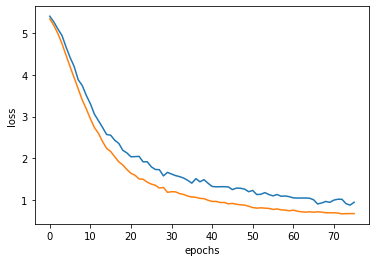

No handles with labels found to put in legend.


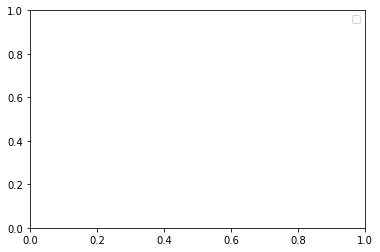

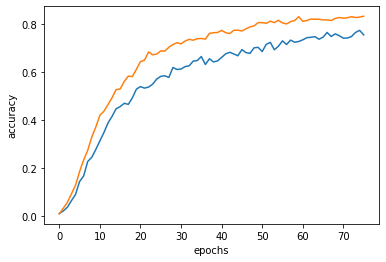

No handles with labels found to put in legend.


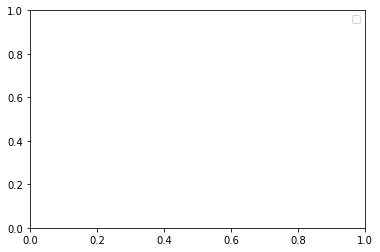

In [ ]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('loss')
# Set a title 
#plt.title('Draw a line.')
# Display the figure.
plt.show()
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title 
#plt.title('Draw a line.')
# Display the figure.
plt.show()
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(val_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.42673054337501526
Test accuracy: 0.874666690826416


In [ ]:
model.save('birdnn.h5')

In [ ]:
model2=tf.keras.models.load_model('birdnn.h5', compile=False)

In [ ]:
# saved_model_dir = ''
# tf.saved_model.save(model, saved_model_dir)

# model.save('test.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model = converter.convert()

with open('birdnn.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp4fnhou03/assets
